In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import matplotlib.dates as mdates
from bs4 import BeautifulSoup
import requests
import glob
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 데이터 전처리

In [50]:
# 파일 불러오고, 결합
file_list = glob.glob('../data/raw/forecast_1525/forecast_*.csv')
df_list = [pd.read_csv(file, encoding='euc-kr') for file in file_list]
forecast_df = pd.concat(df_list, ignore_index=True)

In [118]:
forecast_df['일시'] = pd.to_datetime(forecast_df['일시'])
forecast_df.head()

# '일시'에서 날짜만 추출 / '지점'과 "날짜"별로 그룹화 / 각 그룹별 평균 계산
forecast_df['날짜'] = forecast_df['일시'].dt.date  # 날짜만 추출
grouped = forecast_df.groupby(['지점', '날짜'])
daily_avg = grouped.mean().reset_index()
# daily_avg
#----------------이하 위치별 dataframe---------------
#부안
df_buan = daily_avg[daily_avg['지점'] ==22186]
# df_buan

#가거도
df_gageodo = daily_avg[daily_avg['지점'].isin([22297, 22193])]
# df_gageodo

#마라도
df_marado = daily_avg[daily_avg['지점'] ==22107]
# df_marado

#통영
df_tongyoung = daily_avg[daily_avg['지점'] ==22188]
# df_tongyoung

#동해
df_donghae = daily_avg[daily_avg['지점'].isin([22105, 22305, 22302])]
df_donghae_combined = df_donghae.groupby('날짜').mean(numeric_only=True).reset_index()
df_donghae_combined['지점'] = 22105

# df_donghae_combined

C:\Users\user\AppData\Local\Temp\ipykernel_4052\2925809961.py:32: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_tongyoung = df_tongyoung.interpolate(method='linear', limit_direction='forward').fillna(method='bfill')
C:\Users\user\AppData\Local\Temp\ipykernel_4052\2925809961.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tongyoung = df_tongyoung.interpolate(method='linear', limit_direction='forward').fillna(method='bfill')


,지점,날짜,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
10310,22188,2015-12-22,2015-12-22 11:30:00,6.212500,48.000000,7.983333,1026.562500,70.833333,12.437500,14.012500,1.020833,0.620833,0.445833,3.337500,229.916667
10311,22188,2015-12-23,2015-12-23 11:30:00,5.975000,125.833333,7.700000,1020.270833,79.791667,13.870833,14.487500,1.179167,0.716667,0.500000,3.845833,256.250000
10312,22188,2015-12-24,2015-12-24 11:30:00,5.583333,245.333333,7.441667,1017.708333,73.083333,11.558333,15.212500,1.029167,0.612500,0.445833,3.750000,189.791667
10313,22188,2015-12-25,2015-12-25 11:30:00,8.212500,312.791667,11.395833,1019.408333,51.125000,8.062500,15.187500,1.933333,1.116667,0.804167,4.233333,221.625000
10314,22188,2015-12-26,2015-12-26 11:30:00,7.129167,279.416667,9.712500,1020.462500,58.416667,10.237500,14.537500,1.437500,0.854167,0.595833,4.500000,175.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,22188,2025-01-08,2025-01-08 11:30:00,8.658333,289.958333,11.566667,1020.345833,61.666667,5.770833,11.320833,1.875000,1.208333,0.854167,5.816667,227.916667
13569,22188,2025-01-09,2025-01-09 11:30:00,11.712500,307.000000,15.787500,1023.187500,63.833333,0.568500,10.716667,2.445833,1.579167,1.100000,4.950000,304.500000
13570,22188,2025-01-10,2025-01-10 11:30:00,7.029167,323.291667,9.929167,1030.145833,62.666667,0.568500,10.816667,1.783333,1.195833,0.854167,8.470833,163.166667
13571,22188,2025-01-11,2025-01-11 11:30:00,7.312500,303.625000,10.104167,1028.700000,63.625000,2.837500,11.841667,1.587500,1.041667,0.758333,11.304167,81.291667


In [ ]:
df_buan

### 이하 위 데이터프레임 시각화

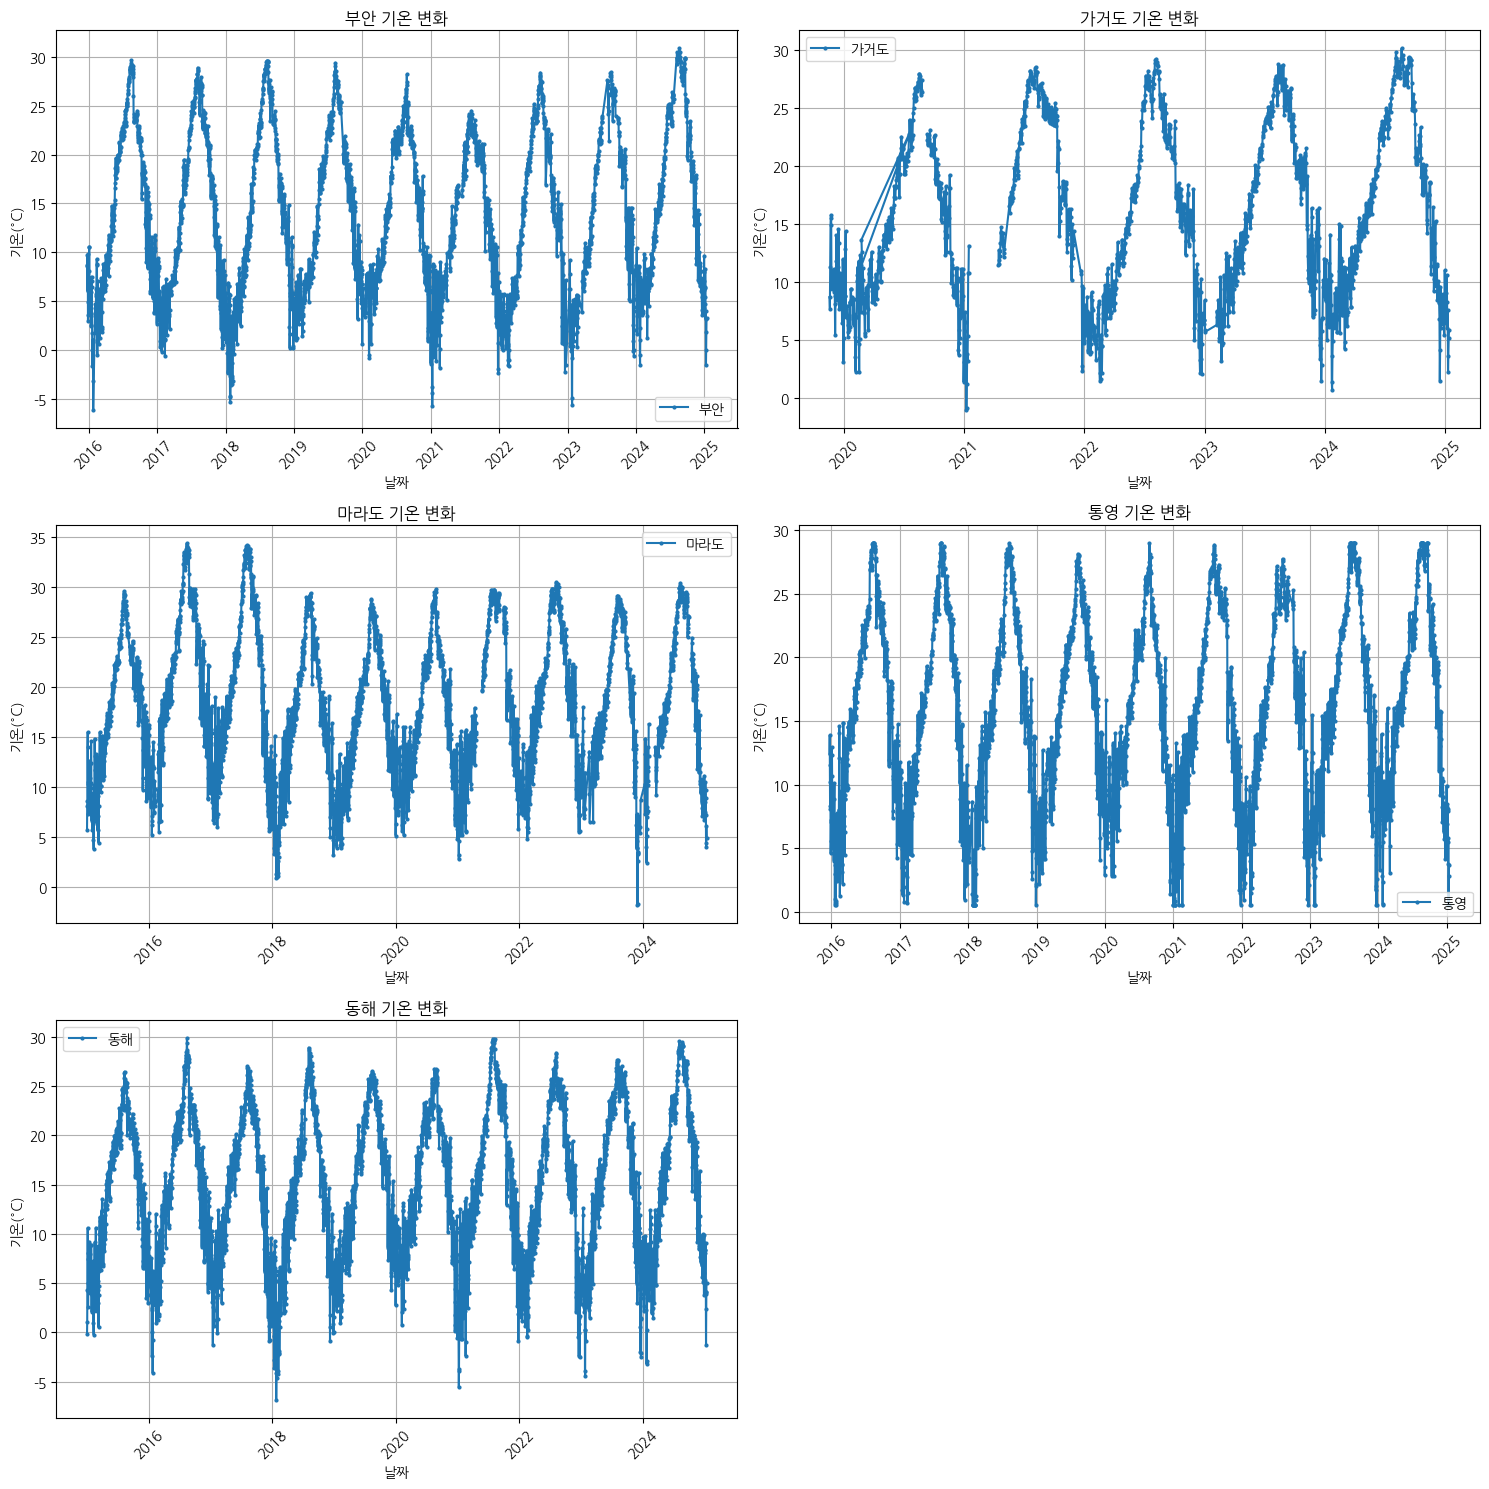

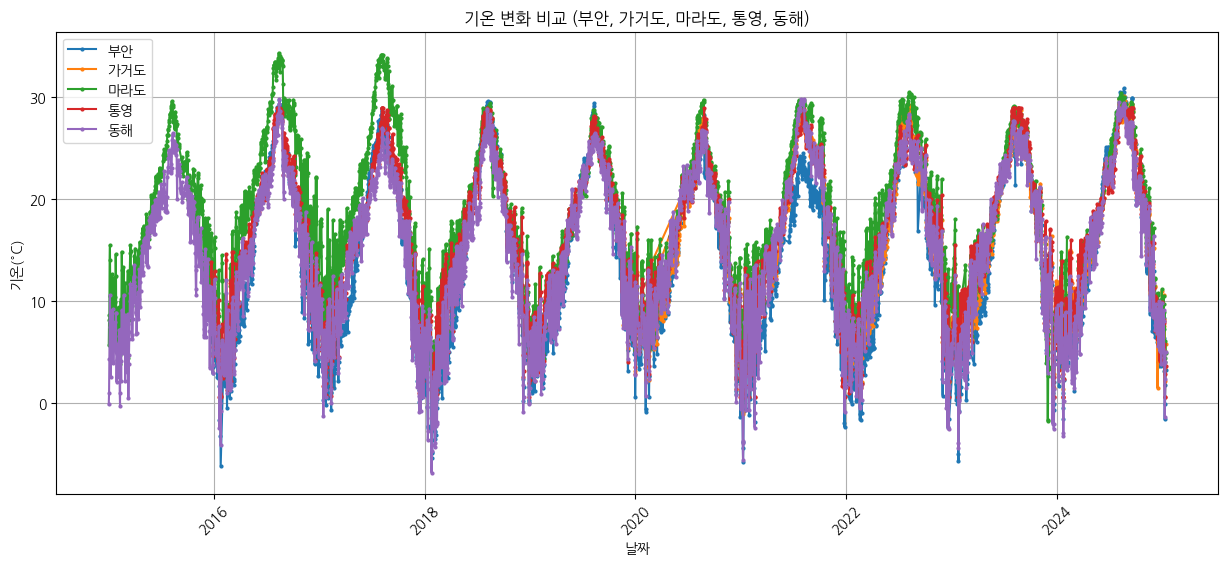

In [120]:
dfs = [df_buan, df_gageodo, df_marado, df_tongyoung, df_donghae_combined]
labels = ['부안', '가거도', '마라도', '통영', '동해']

# 1. 서브플롯: 각각 별도의 차트에 시각화
plt.figure(figsize=(15, 15))  # 서브플롯 크기 설정
for i, (df, label) in enumerate(zip(dfs, labels), start=1):
    plt.subplot(3, 2, i)  # 3행 2열 형태의 서브플롯
    plt.plot(df['날짜'], df['기온(°C)'], label=label, marker='o', markersize=2)
    plt.title(f'{label} 기온 변화')
    plt.xlabel('날짜')
    plt.ylabel('기온(°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
for df, label in zip(dfs, labels):
    plt.plot(df['날짜'], df['기온(°C)'], label=label, marker='o', markersize=2)

plt.title('기온 변화 비교 (부안, 가거도, 마라도, 통영, 동해)')
plt.xlabel('날짜')
plt.ylabel('기온(°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

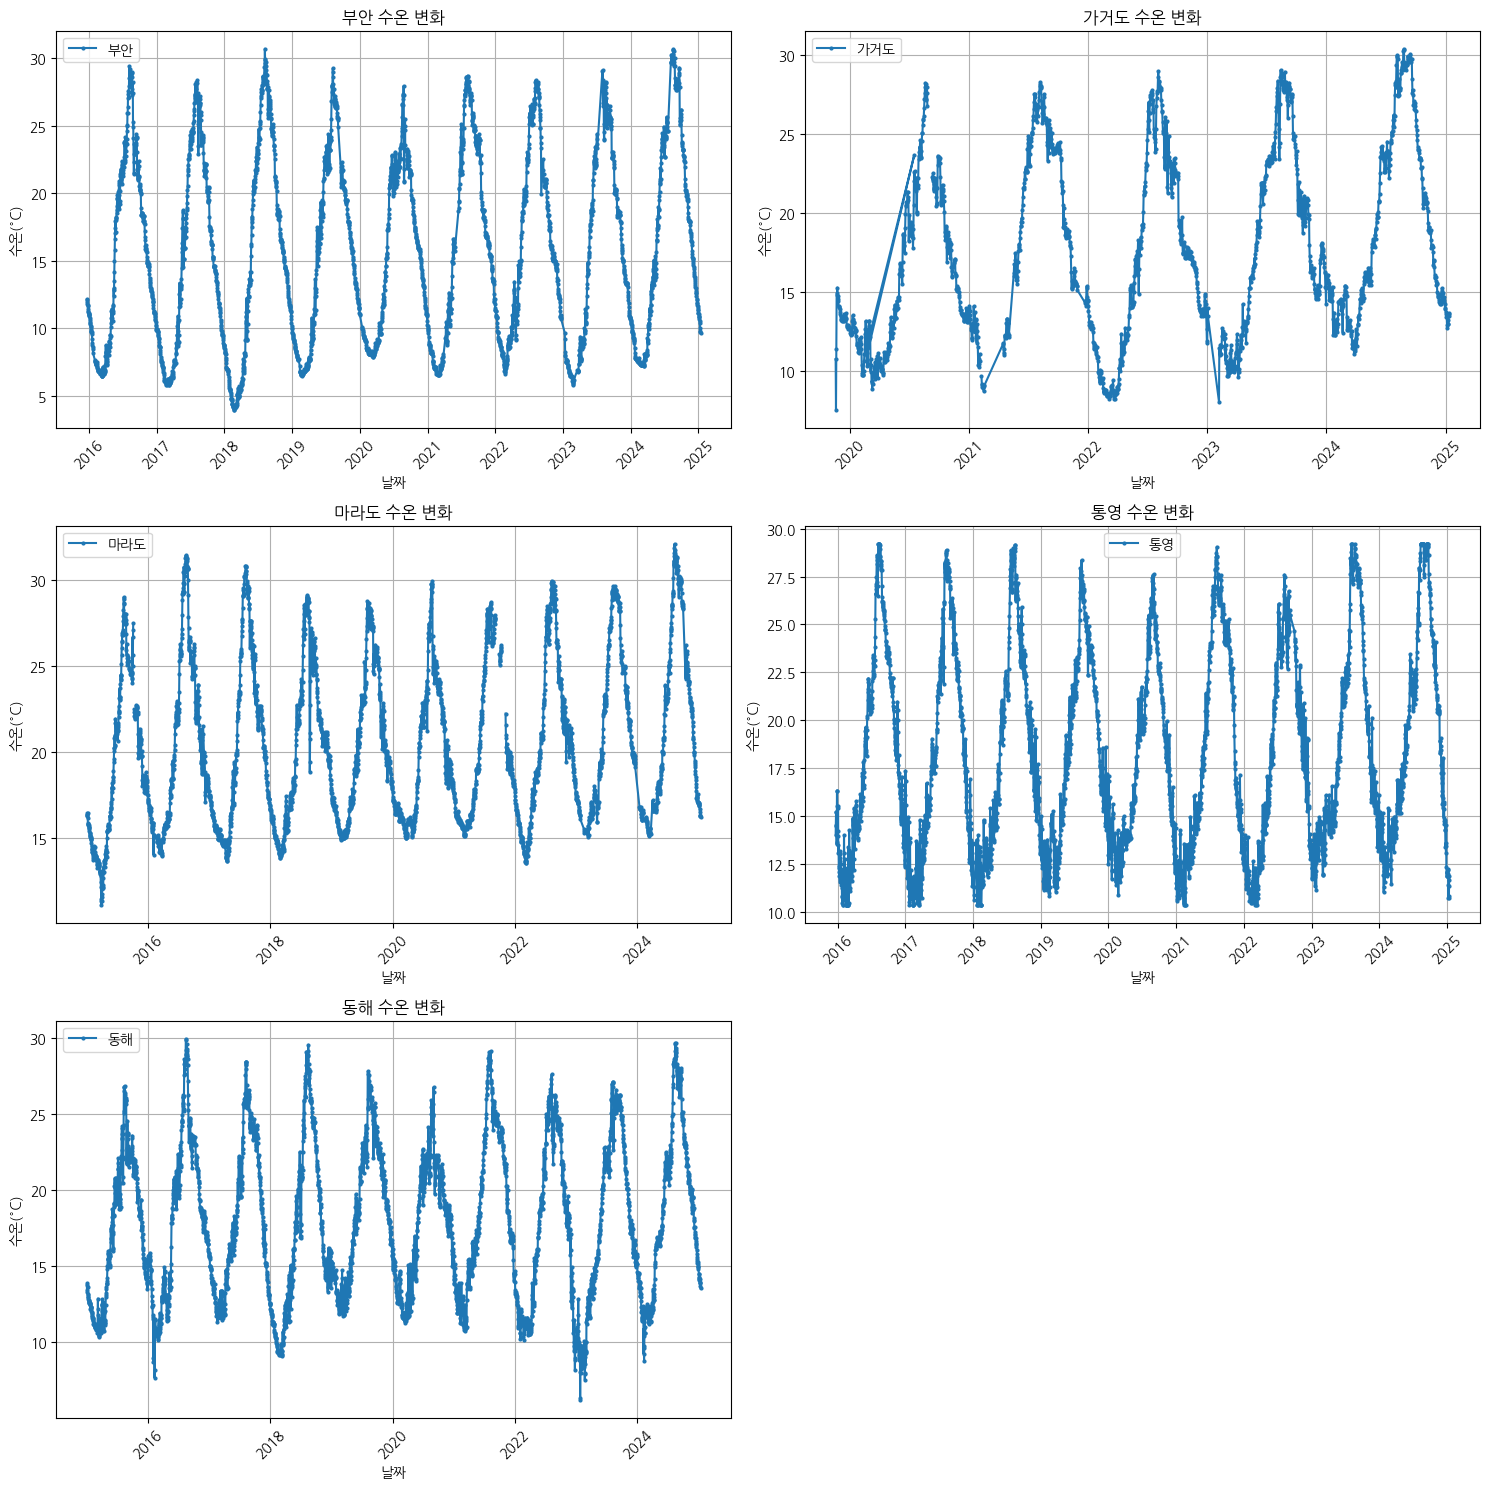

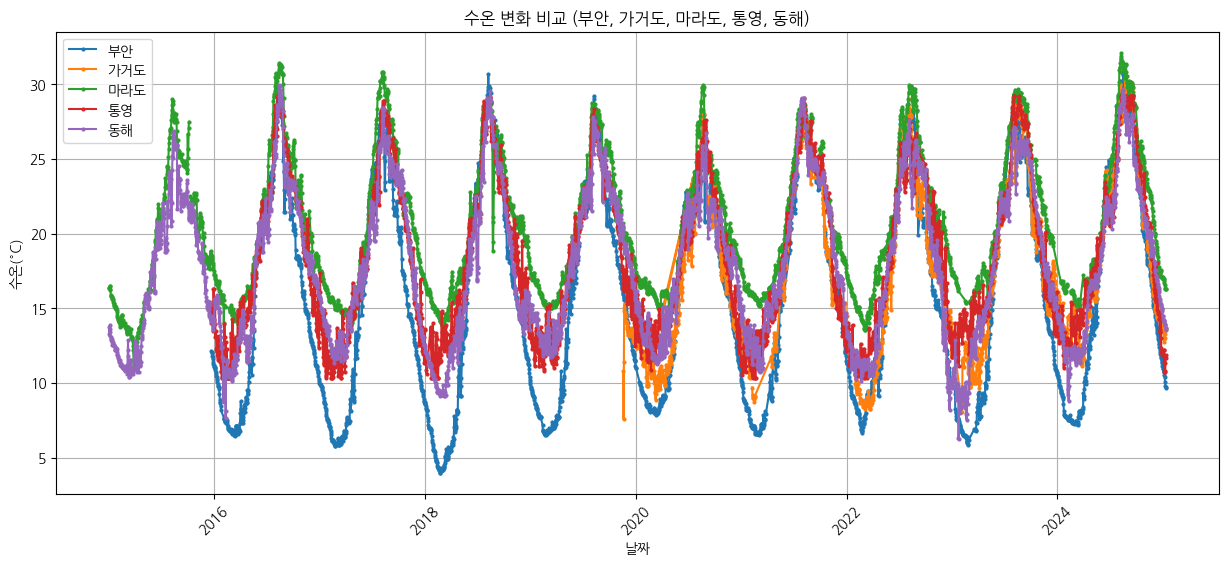

In [121]:
dfs = [df_buan, df_gageodo, df_marado, df_tongyoung, df_donghae_combined]
labels = ['부안', '가거도', '마라도', '통영', '동해']

# 1. 서브플롯: 각각 별도의 차트에 시각화
plt.figure(figsize=(15, 15))  # 서브플롯 크기 설정
for i, (df, label) in enumerate(zip(dfs, labels), start=1):
    plt.subplot(3, 2, i)  # 3행 2열 형태의 서브플롯
    plt.plot(df['날짜'], df['수온(°C)'], label=label, marker='o', markersize=2)
    plt.title(f'{label} 수온 변화')
    plt.xlabel('날짜')
    plt.ylabel('수온(°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
for df, label in zip(dfs, labels):
    plt.plot(df['날짜'], df['수온(°C)'], label=label, marker='o', markersize=2)

plt.title('수온 변화 비교 (부안, 가거도, 마라도, 통영, 동해)')
plt.xlabel('날짜')
plt.ylabel('수온(°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 이하 어종별 데이터프레임

In [128]:
# Load the uploaded CSV file
file_path = "../data/raw/ikh_item_price_2025-01-16.csv"
data = pd.read_csv(file_path)

# Step 1: 'priceDate'를 datetime 형식으로 변환
data['priceDate'] = pd.to_datetime(data['priceDate'], errors='coerce')

# Step 2: 결측치 처리
data = data.dropna()

# Step 3: 'item' 열에서 어종 이름을 정리 (예: '방어2' -> '방어')
data['item'] = data['item'].str.replace(r'\d+', '', regex=True).str.strip()

# Step 4: 어종별로 데이터프레임 생성
# 광어 데이터프레임
df_gwanguh = data[data['item'] == '광어']

# 농어 데이터프레임
df_nonguh = data[data['item'] == '농어']

# 대게 데이터프레임
df_daege = data[data['item'] == '대게']

# 방어 데이터프레임
df_bangeo = data[data['item'] == '방어']

# 연어 데이터프레임
df_samon = data[data['item'] == '연어']

# 우럭 데이터프레임
df_ureok = data[data['item'] == '우럭']

# 참돔 데이터프레임
df_chamdom = data[data['item'] == '참돔']

# 데이터 요약 정보 출력
# data_summary = data.describe()
# data_summary

In [130]:
df_chamdom 

,priceDate,minPrice,avgPrice,maxPrice,item,market
107985,2015-03-06,35000,35000,35000,참돔,노량진 1층
107986,2015-03-14,30000,30000,30000,참돔,노량진 1층
107987,2015-04-18,30000,30000,30000,참돔,노량진 1층
107988,2015-04-28,30000,30000,30000,참돔,노량진 1층
107989,2015-06-02,30000,30000,30000,참돔,노량진 1층
...,...,...,...,...,...,...
129735,2025-01-12,40000,40000,40000,참돔,마포농수산물시장
129736,2025-01-13,40000,40000,40000,참돔,마포농수산물시장
129737,2025-01-14,40000,40000,40000,참돔,마포농수산물시장
129738,2025-01-15,40000,40000,40000,참돔,마포농수산물시장


In [123]:
fish_banned = "../data/raw/금어기_데이터.csv"
df = pd.read_csv(fish_banned, encoding='utf-8-sig')
df

,어종,포획금지 시작일,포획금지 종료일
0,감성돔,5월 1일,5월 31일
1,대구,1월 16일,2월 15일
2,명태,1월 1일,12월 31일
3,살오징어,4월 1일,5월 31일
4,고등어,4월 1일,6월 30일
5,주꾸미,5월 11일,8월 31일
6,꽃게,6월 21일,8월 20일
7,낙지,6월 1일,6월 30일
8,삼치,5월 1일,5월 31일
9,참문어,5월 16일,6월 30일
